In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import statsmodels.formula.api as sm
%matplotlib inline

In [3]:
busImg = mpimg.imread('images/BusStop.png')
recImg = mpimg.imread('images/Trash.png')
strtImg = mpimg.imread('images/Str_Density.png')
casesImg = mpimg.imread('images/Case.png')

In [4]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [5]:
busGray = rgb2gray(busImg)   
recGray = rgb2gray(recImg) 
strtGray = rgb2gray(strtImg)   
casesGray = rgb2gray(casesImg)   

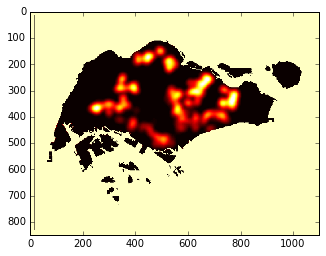

In [6]:
plt.imshow(strtGray, cmap = plt.get_cmap('hot'))

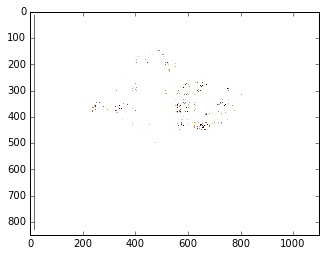

In [7]:
plt.imshow(casesGray, cmap = plt.get_cmap('hot'))

In [8]:
strtGray[350:450,450]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.01176471,  0.01

In [9]:
busStops = busGray.ravel()
recBins = recGray.ravel()
strtDens = strtGray.ravel()
dengCases = casesGray.ravel()

In [10]:
dengueDF = pd.DataFrame(busStops) 

In [11]:
dengueDF['trashBins'] = recBins
dengueDF['streetDens'] = strtDens
dengueDF['cases'] = dengCases

In [12]:
dengueDF = dengueDF.rename(columns={0: 'busStops'});

In [13]:
dengueDF_nz = dengueDF[((dengueDF['trashBins']!=0.0) * (dengueDF['streetDens']!=0.0) * (dengueDF['busStops']!=0.0))]

/usr/local/lib/python2.7/dist-packages/pandas/computation/expressions.py:190: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


In [14]:
dengueDF_norm = (dengueDF_nz - dengueDF_nz.mean()) / (dengueDF_nz.max() - dengueDF_nz.min())

In [15]:
result = sm.ols(formula="cases ~ trashBins + busStops + streetDens", data=dengueDF_norm).fit()

In [16]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  cases   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2703.
Date:                Sat, 16 Apr 2016   Prob (F-statistic):               0.00
Time:                        17:41:53   Log-Likelihood:             1.3543e+06
No. Observations:              783494   AIC:                        -2.709e+06
Df Residuals:                  783490   BIC:                        -2.709e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -5.026e-14   4.85e-05  -1.04e-09      1.000     -9.51e-05  9.51e-05
trashBins      0.0152      0.002      9.449      0.000         0.012     0.018
busStops      -0.0198      0.001    -25.821      0.000        -0.021    -0.018
streetDens     0.0137      0.002      8.153      0.000         0.010     0.017
==============================================================================
Omnibus:                  1744704.588   Durbin-Watson:                   0.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       6898665337.720
Skew:                         -21.270   Prob(JB):                         0.00
Kurtosis:                     460.723   Cond. No.                         47.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""